# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Импорт библиотек и модулей

In [19]:
pip install stumpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 176 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 28.8 MB 6.5 MB/s eta 0:00:01    |█▌                              | 1.4 MB 8.4 MB/s eta 0:00:04
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [21]:
import sys
import os
from pathlib import Path
import importlib.util
import shutil

# Get the absolute path to the notebook's directory
notebook_dir = Path('/Users/rm22/Documents/susu/term3/time_series/2025-Rakov-TimeSeriesCourse/practice/05 Snippets').resolve()

# Verify the modules directory exists
modules_path = notebook_dir / 'modules' / 'snippets.py'
if not modules_path.exists():
    raise FileNotFoundError(f"Could not find modules/snippets.py at {modules_path}")

# Remove __pycache__ if it exists (can cause import issues)
pycache_dir = notebook_dir / 'modules' / '__pycache__'
if pycache_dir.exists():
    shutil.rmtree(pycache_dir)

# Add to Python path if not already there
notebook_dir_str = str(notebook_dir)
if notebook_dir_str not in sys.path:
    sys.path.insert(0, notebook_dir_str)

# Change to the notebook directory
os.chdir(notebook_dir)

# Clear any cached modules that might cause issues
modules_to_remove = [key for key in sys.modules.keys() if key.startswith('modules')]
for mod in modules_to_remove:
    del sys.modules[mod]

import numpy as np
import matplotlib.pyplot as plt

# Import using importlib to avoid any caching issues
spec = importlib.util.spec_from_file_location("modules.snippets", modules_path)
snippets_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(snippets_module)

# Import all functions from snippets module
for name in dir(snippets_module):
    if not name.startswith('_'):
        globals()[name] = getattr(snippets_module, name)

from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

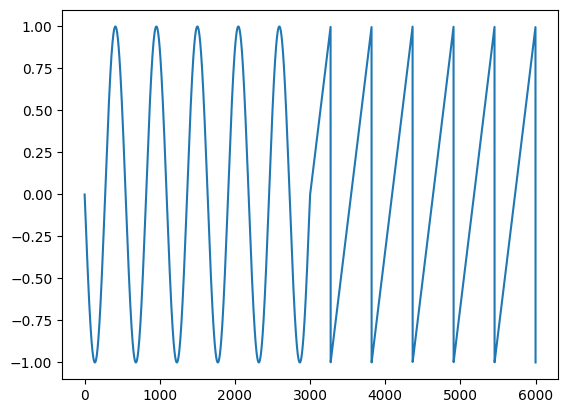

In [3]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [4]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


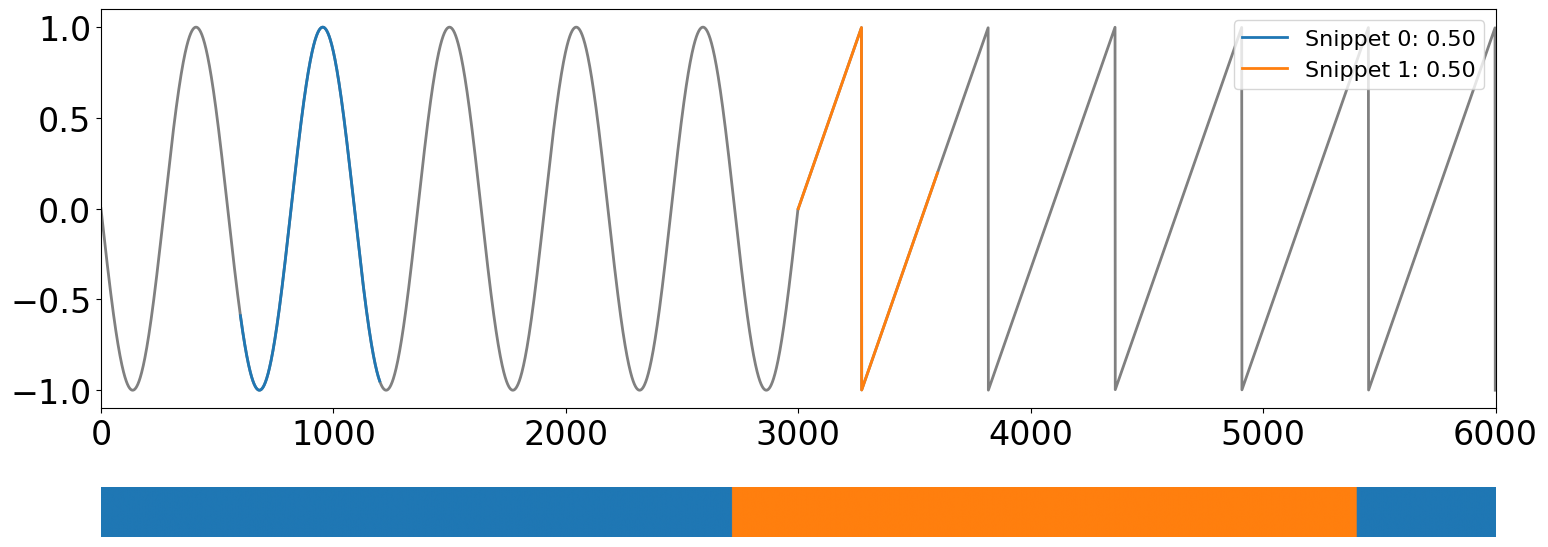

<Axes: >

In [5]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [ ]:
import os
import pandas as pd

practice_dir_path = '/Users/rm22/Documents/susu/term3/time_series/2025-Rakov-TimeSeriesCourse/practice/05 Snippets'
os.chdir(practice_dir_path)

# Путь к датасету
ts_url = './datasets/PAMAP/PAMAP.txt'

# Загружаем как DataFrame
df = pd.read_csv(ts_url, sep=' ', header=None).T
start_time = 1790
end_time = 1930

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 11].to_numpy()
snp = snippets(ts, 2000, 2, s=1000)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,505.71,2.0,NaN,35.0625,0.497271,9.08249,-1.875540,0.319610,9.10631,-1.642520,-0.064955,0.033557,0.051343,2.52139,-23.9094,3.66977,0.636708,-0.766698,0.073248,0.037565
1,505.72,2.0,NaN,35.0625,0.693164,8.93258,-1.677900,0.379878,8.90965,-1.416770,0.063998,0.052043,0.078401,2.12795,-23.8953,4.08997,0.636387,-0.766974,0.073379,0.037113
2,505.73,2.0,79.0,35.0625,0.929013,9.04638,-1.441670,0.606483,8.89380,-1.236830,0.192540,0.034474,0.070010,1.87388,-24.2730,4.23135,0.635648,-0.767586,0.073587,0.036706
3,505.74,2.0,NaN,35.0625,1.039680,9.38386,-1.595650,0.772609,8.99907,-1.237530,0.282665,0.053817,0.057465,1.73597,-23.3649,3.94322,0.635121,-0.768060,0.073553,0.035983
4,505.75,2.0,NaN,35.0625,1.070930,9.38219,-1.827400,0.938327,9.21025,-1.419260,0.335187,0.016476,0.011713,2.25530,-24.4165,4.65783,0.633378,-0.769606,0.072906,0.034988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145995,2305.66,4.0,NaN,35.6875,2.140840,7.09274,-0.213018,2.107840,7.31908,-0.041456,0.256645,-0.568124,0.005918,-12.27830,-50.9797,20.50000,0.566790,-0.673692,-0.347012,-0.323220
145996,2305.67,4.0,NaN,35.6875,2.027390,6.56647,-0.135921,2.015190,6.94196,-0.041992,0.221546,-0.501649,0.103945,-12.52640,-51.7445,20.64360,0.566736,-0.675315,-0.345593,-0.321443
145997,2305.68,4.0,NaN,35.6875,1.978930,6.11268,-0.445092,1.861420,6.39894,-0.027528,0.162119,-0.355711,0.133332,-11.76720,-51.6443,21.35340,0.566580,-0.676581,-0.344391,-0.320344
145998,2305.69,4.0,NaN,35.6875,1.677590,5.73813,-0.294450,1.707950,5.96165,-0.073210,0.122680,-0.262807,0.188172,-12.41520,-51.3625,21.34730,0.566308,-0.677672,-0.343209,-0.319786


Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

2000


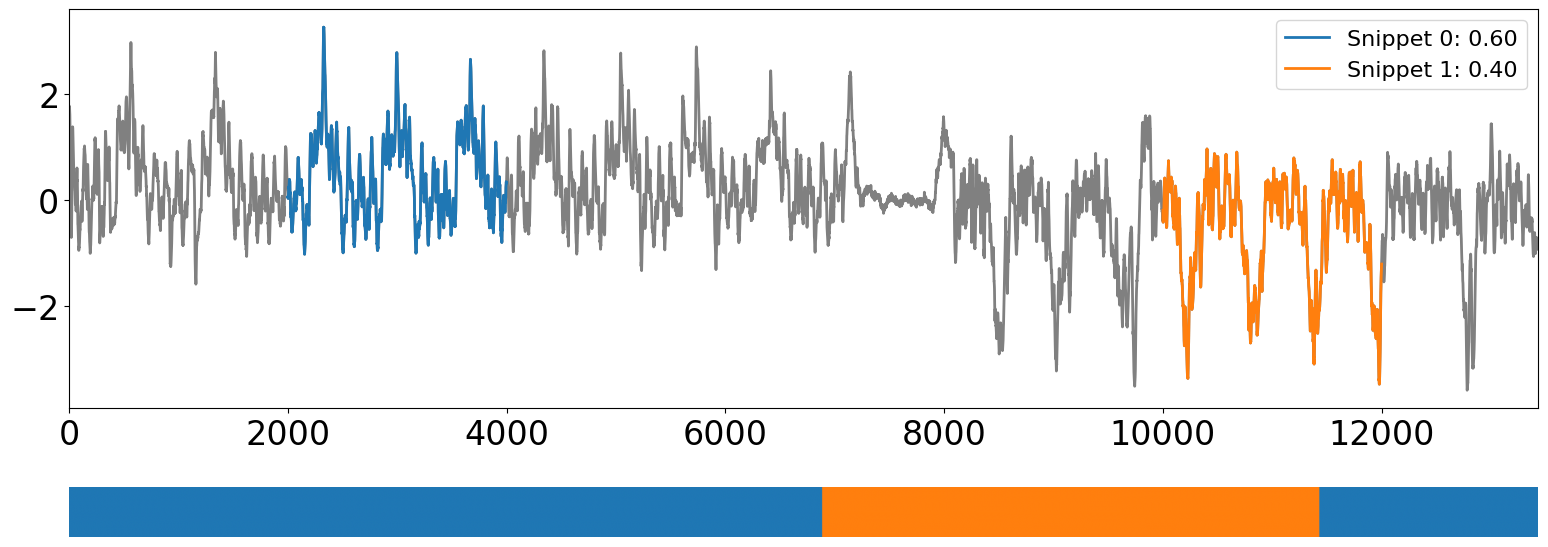

<Axes: >

In [15]:
plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [17]:
from sklearn.metrics import accuracy_score

labels_pred = np.zeros_like(ts)
snippets_regimes = snp[-1]
for regime in snippets_regimes:
  labels_pred[regime[1] : regime[2]] = regime[0]

# Получаем правильные метки
labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels = np.where(labels == 12, 0, labels)
labels = np.where(labels == 13, 1, labels)

accuracy_score(labels, labels_pred)

0.8026658723657756

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Алгоритм SnippetFinder был применён к фрагменту временного ряда гироскопа оси Y для выделения типичных подпоследовательностей, соответствующих различным видам активности человека. На основе найденных сниппетов была выполнена сегментация ряда и сопоставление полученной разметки с истинными метками активности.  

Точность классификации составила **0.8027**, что подтверждает способность метода успешно выделять повторяющиеся участки движения и разделять ходьбу и движения по лестнице без использования обучаемых моделей. Большинство ошибок наблюдается на переходных фрагментах сигнала, где паттерны различаются слабее и имеют пересечение по форме.  

В целом, сниппеты продемонстрировали адекватное качество сегментации и подтвердили эффективность данного подхода для анализа повторяющихся структур во временных рядах датчиков движения.


### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

600


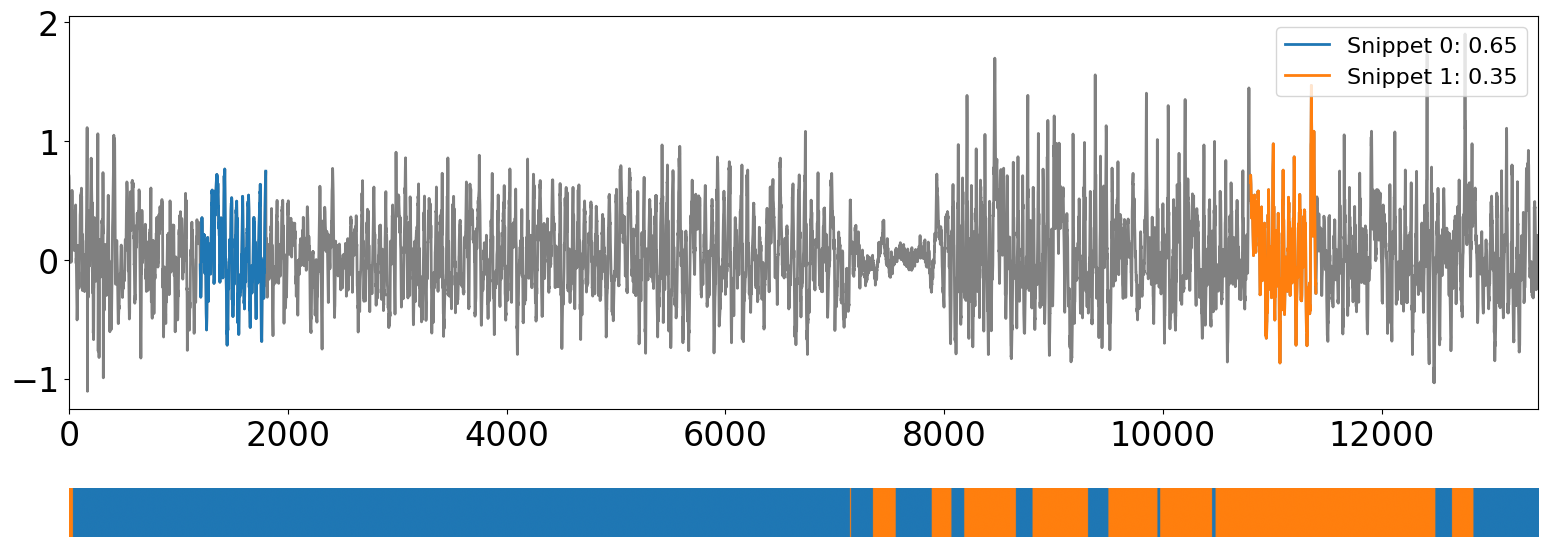

600


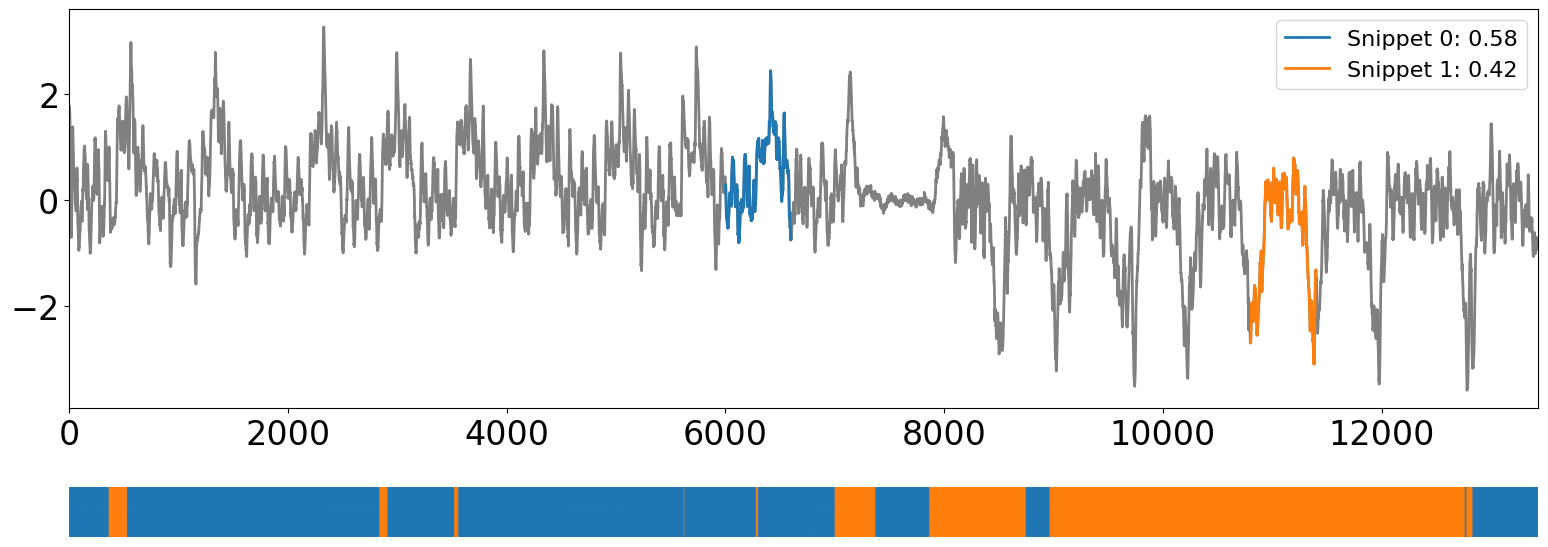

600


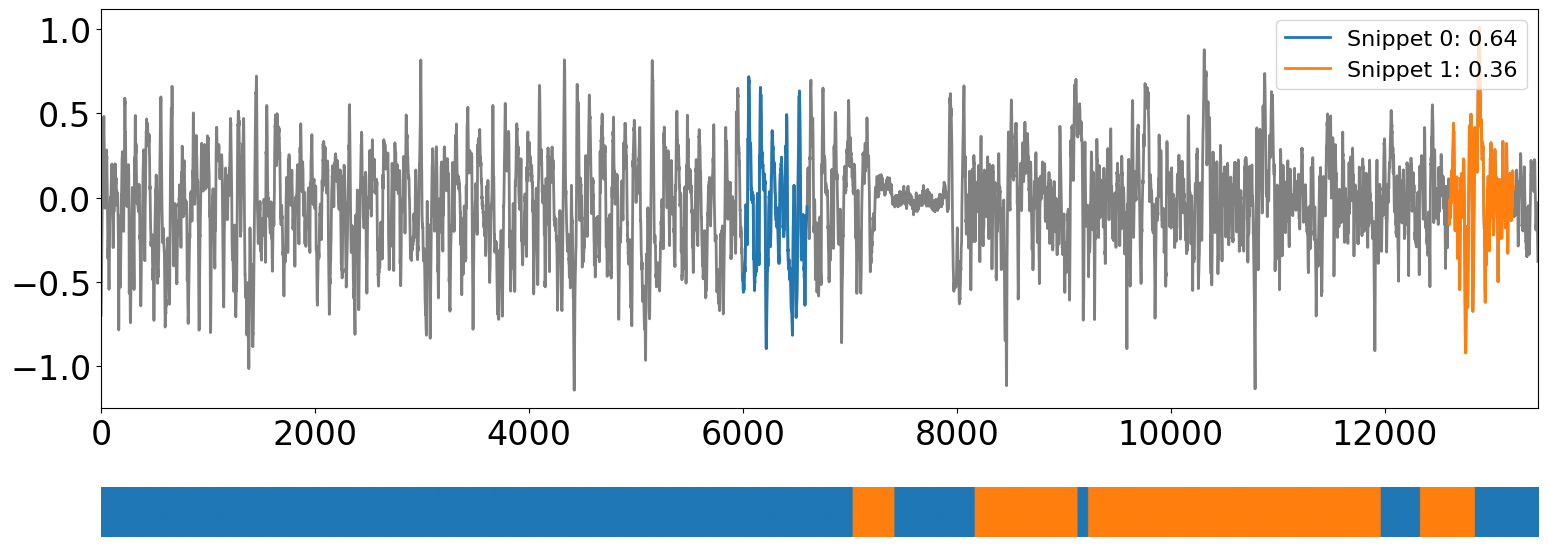

In [12]:
data_path = 'datasets/PAMAP/PAMAP.txt'
pamap = np.loadtxt(data_path)

# Извлечение данных
timestamps = pamap[0]
gyro_x = pamap[10]  # Гироскоп по оси X
gyro_y = pamap[11]  # Гироскоп по оси Y
gyro_z = pamap[12]  # Гироскоп по оси Z
activity_ids = pamap[1]

# Фильтрация данных по временным меткам (от 1790 до 1930 секунд)
filtered_timestamps = timestamps[(timestamps >= 1790) & (timestamps <= 1930)]
gyro_x_filtered = gyro_x[(timestamps >= 1790) & (timestamps <= 1930)]
gyro_y_filtered = gyro_y[(timestamps >= 1790) & (timestamps <= 1930)]
gyro_z_filtered = gyro_z[(timestamps >= 1790) & (timestamps <= 1930)]
filtered_activity_ids = activity_ids[(timestamps >= 1790) & (timestamps <= 1930)]
filtered_activity_ids -= filtered_activity_ids.min()

# Применение поиска сниппетов для каждой оси гироскопа
snp_x = snippets(gyro_x_filtered, 600, 2, percentage=0.5)
snp_y = snippets(gyro_y_filtered, 600, 2, percentage=0.5)
snp_z = snippets(gyro_z_filtered, 600, 2, percentage=0.5)

for data, snp in zip((gyro_x_filtered, gyro_y_filtered, gyro_z_filtered), (snp_x, snp_y, snp_z)):
    plot_snippets(data, snp)

# Инициализация массивов для меток активности
snp_activity_ids_x = np.zeros(len(gyro_x_filtered))
snp_activity_ids_y = np.zeros(len(gyro_y_filtered))
snp_activity_ids_z = np.zeros(len(gyro_z_filtered))

# Заполнение массивов с метками активности для каждой оси
for value, start, end in snp_x[-1]:
    snp_activity_ids_x[start:end] = value
for value, start, end in snp_y[-1]:
    snp_activity_ids_y[start:end] = value
for value, start, end in snp_z[-1]:
    snp_activity_ids_z[start:end] = value

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [13]:
final_activity_ids = []
for i in range(len(gyro_x_filtered)):
    votes = [snp_activity_ids_x[i], snp_activity_ids_y[i], snp_activity_ids_z[i]]
    final_activity_ids.append(np.bincount(votes).argmax())  # Голосование большинством

final_activity_ids = np.array(final_activity_ids)

# Оценка точности
accuracy = accuracy_score(filtered_activity_ids, final_activity_ids)
accuracy

C:\Users\SlunKing\AppData\Local\Temp\ipykernel_10964\3021411447.py:4: DeprecationWarning: Non-integer input passed to bincount. In a future version of NumPy, this will be an error. (Deprecated NumPy 2.1)
  final_activity_ids.append(np.bincount(votes).argmax())  # Голосование большинством


0.8891288160833953

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Точность разметки, полученная с использованием голосования большинством среди всех трех осей гироскопа, составляет 0.889, что больше, чем точность при использовании одной оси. Это подтверждает, что комбинированные данные с разных осей дают более точную и устойчивую разметку, снижая влияние ошибок и шумов.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [11]:
# INSERT YOUR CODE

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [12]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?